# A remark on *Grid cells on steeply sloping terrain*

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


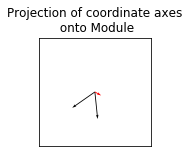

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 1
S = np.ones(m)
k = 3
B, V, S = create_kd_hyper_module(m, k, scale=S)
# V = np.zeros((m,k))


plt.figure(figsize=(2,2))
plt.title("Projection of coordinate axes\n onto Module")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([])
plt.yticks([])


r1 = B[0,0,:] / S[0]
r2 = B[0,1,:] / S[0]

plt.quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
for l in range(2,k):
    plt.quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

# plt.savefig("media/summary/{}d_orientations_m{}.pdf".format(k,m), dpi=150)
plt.show()






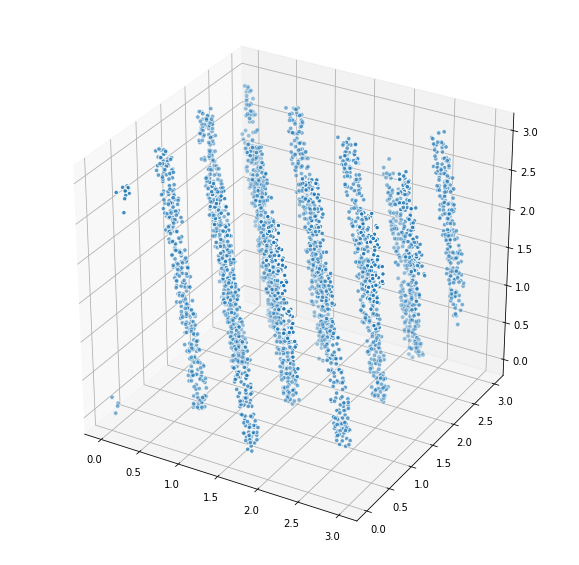

In [57]:
theta = 40/180.*np.pi
Rot   = np.array([
    [1.,0.,0.],
    [0., np.cos(theta), -np.sin(theta)],
    [0., np.sin(theta), np.cos(theta)]
])

T = 100000

X = np.random.sample((T,3))*3.

Q = map_to_hypertorus(B, V, X )
P = map_to_hypertorus(B, V, np.zeros((2*T,3)))

# D = M_dist_comp(Q,P, S=S)[:,0]
D = M_dist_comp_unskewed(Q[:,0],P[:,0], B[0,:2,:2], S=S)

   


spikes = np.where(D < 0.1)[0]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[spikes,0], X[spikes,1], X[spikes,2], edgecolor="white")
plt.show()



In [ ]:
voxels = X[spikes,0], X[spikes,1], X[spikes,2]
ax.voxels(voxels, facecolors=colors, edgecolor='k')
